
# Lab 4: Data Wrangling, ETL, and Exploratory Data Analysis

## Objectives
- Understand the concepts of data wrangling, ETL processes, and exploratory data analysis (EDA).
- Perform hands-on data wrangling and ETL processes on a dataset.
- Conduct EDA to uncover insights using visualization and statistics.


## **Data Wrangling**
- **Definition**: The process of cleaning, transforming, and preparing raw data into a format that is easy to analyze.
- **Key Tasks**: 
  - Handling missing data
  - Correcting inconsistencies
  - Renaming columns
  - Converting data types
- **Purpose**: Ensures the dataset is structured and error-free for accurate analysis.

---

## **ETL (Extract, Transform, Load)**
- **Definition**: A data integration process used to combine data from various sources and make it ready for analysis or storage in a database.
  - **Extract**: Retrieve data from various sources like databases, APIs, or flat files.
  - **Transform**: Modify the data into a suitable format, applying operations such as filtering, aggregating, or encoding.
  - **Load**: Save the transformed data into a target system like a database, data warehouse, or file storage.

---

## **Dataset**
- **Definition**: A collection of related data organized in a structured format, typically in rows and columns (like a spreadsheet or database table).
- **Purpose**: Serves as the input for data wrangling, ETL processes, and analysis.

---

## **Exploratory Data Analysis (EDA)**
- **Definition**: The process of analyzing and visualizing data to uncover patterns, relationships, and insights.
- **Key Steps**:
  - **Descriptive Statistics**: Understanding measures like mean, median, and standard deviation.
  - **Visualization**: Using charts, graphs, or plots to interpret data trends and distributions.
  - **Hypothesis Generation**: Formulating questions or assumptions about the data based on observations.
- **Purpose**: Helps in understanding data properties and preparing it for advanced analysis or modeling.


# **Online Resources to Get Datasets**

## 1. **[Kaggle](https://www.kaggle.com/)**
- **Description**: A platform for data science and machine learning enthusiasts.
- **Features**:
  - Extensive collection of datasets across various domains.
  - Community discussions and shared notebooks for insights.
  - Free download with a Kaggle account.

---

## 2. **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**
- **Description**: A repository of machine learning datasets maintained by the University of California, Irvine.
- **Features**:
  - Datasets tailored for machine learning tasks.
  - Covers diverse topics such as healthcare, engineering, and biology.
  - Available in plain text or CSV format.

---

## 3. **[Google Dataset Search](https://datasetsearch.research.google.com/)**
- **Description**: A search engine designed to find datasets from various sources.
- **Features**:
  - Indexed datasets from government, research, and private organizations.
  - Includes links to datasets hosted on external platforms.
  - Free to use.

---

## 4. **[Data.gov](https://www.data.gov/)**
- **Description**: A U.S. government portal providing open datasets.
- **Features**:
  - Topics include agriculture, climate, education, and public safety.
  - Useful for academic, commercial, and personal projects.
  - Data formats include CSV, JSON, and APIs.

---

## 5. **[FiveThirtyEight](https://data.fivethirtyeight.com/)**
- **Description**: Datasets from FiveThirtyEight’s data-driven journalism.
- **Features**:
  - Covers sports, politics, economics, and culture.
  - Free to use and well-documented.
  - Comes with insights and context for better understanding.

---

## 6. **[Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)**
- **Description**: A curated list of free public datasets available on GitHub.
- **Features**:
  - Datasets span a wide range of categories, including health, finance, and technology.
  - Continuously updated with contributions from the community.
  - Provides links and descriptions for easy access.




## Step 1: Dataset Introduction

In this lab, we will use a sample dataset. Download or load the dataset into your working directory.

For example, we will use the **Titanic dataset** available in CSV format.

### Instructions:
1. Import necessary libraries.
2. Load the dataset using Pandas.
3. Explore the dataset structure.

#### Example Code:


In [1]:

import pandas as pd

# Load dataset
file_path = 'titanic.csv'  # Update this path as necessary
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Step 2: Data Wrangling

### Tasks:
1. Handle missing values (e.g., filling, dropping).
2. Remove duplicates.
3. Rename columns for clarity.
4. Convert data types if necessary.

#### Example Code:


In [2]:
# Handling missing values
# Fill missing 'Age' values with the median of the 'Age' column.
# This helps to avoid dropping rows and ensures no data is lost.
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age values with the median

# Drop rows where 'Embarked' column has missing values.
# This assumes that 'Embarked' is critical for analysis, and rows with missing 'Embarked' should be discarded.
df.dropna(subset=['Embarked'], inplace=True)  # Drop rows where 'Embarked' is missing

# Meaning of the Embarked column:
# C: Passenger boarded in Cherbourg.
# Q: Passenger boarded in Queenstown.
# S: Passenger boarded in Southampton.

# Remove duplicate rows in the dataframe.
# This ensures that the data is unique and avoids bias in analysis caused by repeated records.
df = df.drop_duplicates()  # Remove duplicates and reassign the dataframe

# Rename columns for clarity to make the dataset more understandable.
# The 'Pclass' column is renamed to 'Passenger_Class' and 'Fare' to 'Ticket_Fare' to make the names more descriptive.
df.rename(columns={'Pclass': 'Passenger_Class', 'Fare': 'Ticket_Fare'}, inplace=True)  # Renaming columns

# Convert the 'Passenger_Class' column to the 'category' data type.
# This is an optimization technique because 'Passenger_Class' has a limited number of categories and doesn't need to be stored as a regular integer or string.
df['Passenger_Class'] = df['Passenger_Class'].astype('category')  # Convert to category

# Display the updated dataframe structure with data types after the changes.
# This will show the updated column data types and confirm the changes made in the previous steps.
df.info()  # Check updated data types


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      889 non-null    int64   
 1   Survived         889 non-null    int64   
 2   Passenger_Class  889 non-null    category
 3   Name             889 non-null    object  
 4   Sex              889 non-null    object  
 5   Age              889 non-null    float64 
 6   SibSp            889 non-null    int64   
 7   Parch            889 non-null    int64   
 8   Ticket           889 non-null    object  
 9   Ticket_Fare      889 non-null    float64 
 10  Cabin            202 non-null    object  
 11  Embarked         889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 84.3+ KB



## Step 3: ETL Process

### Tasks:
1. Extract: Load data from a source (done earlier).
2. Transform: Clean, aggregate, and modify data.
3. Load: Save processed data into a new file format.

#### Example Code:


In [3]:

# Transform: Add a new column
df['Family_Size'] = df['SibSp'] + df['Parch']

# Save the transformed data
output_path = 'processed_titanic.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")


Processed data saved to processed_titanic.csv



## Step 4: Exploratory Data Analysis (EDA)

### Tasks:
1. Calculate descriptive statistics.
2. Visualize data trends and distributions.

#### Example Code:


       PassengerId    Survived         Age       SibSp       Parch  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452   29.315152    0.524184    0.382452   
std     256.998173    0.486260   12.984932    1.103705    0.806761   
min       1.000000    0.000000    0.420000    0.000000    0.000000   
25%     224.000000    0.000000   22.000000    0.000000    0.000000   
50%     446.000000    0.000000   28.000000    0.000000    0.000000   
75%     668.000000    1.000000   35.000000    1.000000    0.000000   
max     891.000000    1.000000   80.000000    8.000000    6.000000   

       Ticket_Fare  Family_Size  
count   889.000000   889.000000  
mean     32.096681     0.906637  
std      49.697504     1.614703  
min       0.000000     0.000000  
25%       7.895800     0.000000  
50%      14.454200     0.000000  
75%      31.000000     1.000000  
max     512.329200    10.000000  


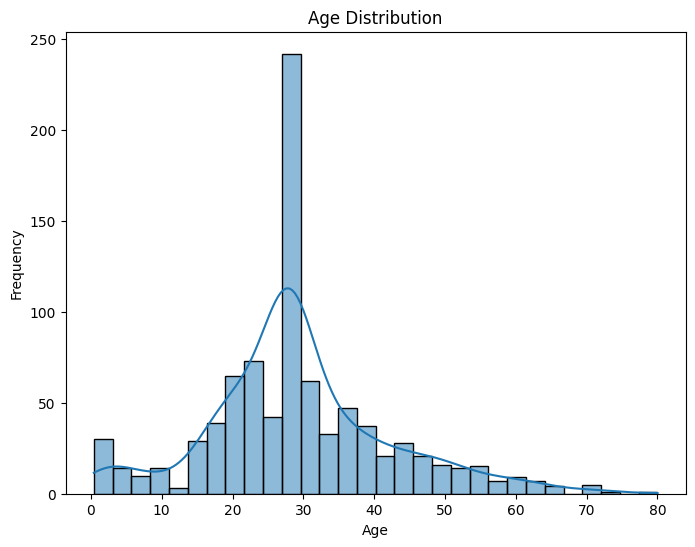

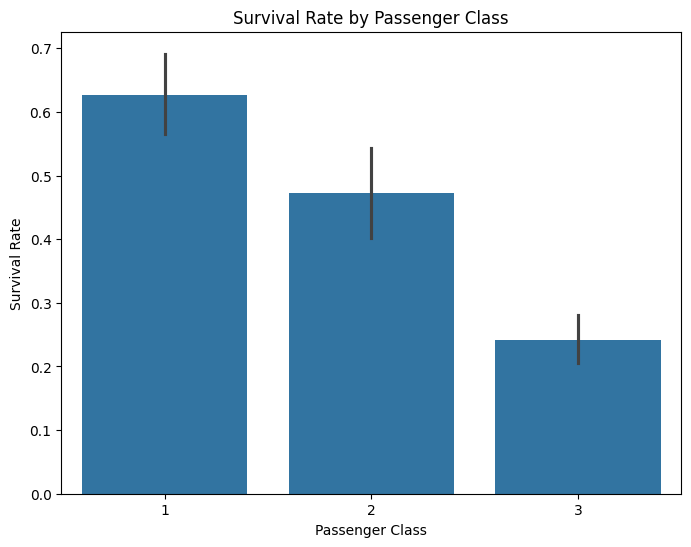

In [4]:

import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For advanced visualizations with better styling

# Descriptive statistics
# This gives an overview of the numerical columns in the dataset, including count, mean, standard deviation, etc.
print(df.describe())

# Visualization: Age distribution
# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Create a histogram to visualize the distribution of the 'Age' column
# kde=True adds a Kernel Density Estimate (smooth curve) to the histogram
sns.histplot(df['Age'], kde=True, bins=30)

# Adding title and labels to the plot for clarity
plt.title('Age Distribution')  # Title of the plot
plt.xlabel('Age')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

# Display the plot
plt.show()

# Visualization: Survival rate by passenger class
# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Create a bar plot to show the survival rate for each passenger class
# The 'Passenger_Class' is on the x-axis, and 'Survived' is the y-axis representing the survival rate
sns.barplot(x='Passenger_Class', y='Survived', data=df)

# Adding title and labels to the plot for clarity
plt.title('Survival Rate by Passenger Class')  # Title of the plot
plt.xlabel('Passenger Class')  # X-axis label
plt.ylabel('Survival Rate')  # Y-axis label

# Display the plot
plt.show()


## Practice Questions for Titanic Dataset

### 1. **Data Preprocessing:**
   - **Question:** Write a Python function to calculate the percentage of missing values for each column in the dataset. Use the function to identify columns with missing values in the Titanic dataset and display their percentages. Visualize the missing data percentages using a **bar plot**.
   - **Hint:** Use the `isnull()` method combined with `sum()` to count missing values for each column. Divide the missing values by the total number of rows to calculate percentages. For visualization, use Matplotlib or Seaborn to create a bar plot.

### 2. **Feature Creation:**
   - **Question:** Create a new column **Age_Category** by categorizing passengers into three groups: **Child** (0-12), **Teen** (13-19), **Adult** (20+). Calculate the survival rate for each group and compare the results.
   - **Hint:** Use the `pd.cut()` method to create bins for age categories. Group the data by the new column using `groupby()` and calculate the mean survival rate for each group.

### 3. **Family Impact on Survival:**
   - **Question:** Investigate the impact of family size on survival. Create a new column **Large_Family** (True if **Family_Size** > 3, False otherwise). Calculate and visualize the survival rate for passengers with large families versus those without using a **bar plot**.
   - **Hint:** Family size can be calculated as the sum of `SibSp` and `Parch` plus one (self). Use a conditional statement (`> 3`) to create the new column. Use `groupby()` to find the survival rates and visualize the results with a bar plot.

### 4. **Passenger Class and Fare Analysis:**
   - **Question:** Compare the distribution of **Fare** across the different **Passenger_Class** categories using a **box plot**. What can you conclude about the distribution of ticket prices for each class? Are there any outliers?
   - **Hint:** Use Seaborn's `boxplot()` function with `Pclass` on the x-axis and `Fare` on the y-axis. Look for the spread of values and points outside the whiskers to identify outliers.

### 5. **Embarked Location Analysis:**
   - **Question:** Analyze the survival rates based on the **Embarked** column (Cherbourg, Queenstown, and Southampton). Create a **bar plot** to visualize the survival rate for passengers who boarded at each of the three locations. Which embarkation point had the highest survival rate?
   - **Hint:** Use `groupby()` on the Embarked column and calculate the mean survival rate. Use Matplotlib or Seaborn to create a bar plot showing survival rates.

### 6. **Passenger Cabin Analysis:**
   - **Question:** Investigate the **Cabin** column to check for missing or irregular data. Create a new column **Has_Cabin** where 1 indicates that a passenger has a cabin, and 0 indicates they do not. Calculate the survival rate for passengers with and without cabins. Visualize the results using a **bar plot**.
   - **Hint:** Use the `notnull()` method on the Cabin column to check if a passenger has a cabin. Convert the Boolean values to integers for the new column. Use `groupby()` to calculate survival rates and a bar plot for visualization.


## Additional Practice Question: Wine Quality Dataset - Basic Data Exploration

**Question:**
- Load the **Wine Quality Dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) or from a CSV file.
- Perform the following tasks:
  1. Display the first 5 rows of the dataset.
  2. Check if there are any missing values in the dataset.
  3. Calculate and print the median of the **alcohol** and **pH** columns.
  4. Create a **box plot** to show the distribution of the **fixed acidity**.
  5. Create a **pair plot** to visualize the relationships between **citric acid**, **residual sugar**, and **density**.
